# Chicago AOT Project

Github: https://github.com/UrbanCCD-UChicago/aot-client-py
Documentation: https://arrayofthings.docs.apiary.io/#introduction/entity-schemas

$ pip install aot-client

### Importing packages and testcode

In [193]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from aot_client import AotClient

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

client = AotClient()
projects = client.list_projects()
for page in projects:
  for proj in page.data:
    print(f'{proj["name"]} is available at /api/projects/{proj["slug"]}')

Chicago is available at /api/projects/chicago
Denver is available at /api/projects/denver
Detroit is available at /api/projects/detroit
NIU is available at /api/projects/niu
Portland is available at /api/projects/portland
Seattle is available at /api/projects/seattle
Stanford is available at /api/projects/stanford
Syracuse is available at /api/projects/syracuse
UNC is available at /api/projects/unc
UW is available at /api/projects/uw


### Reading in Data

In [194]:
#initializing datasets from api
sensors = client.list_sensors()
observations = client.list_observations()
nodes = client.list_nodes()
projects = client.list_projects()
   

In [195]:
# Setting a naive limit, anyone have a better idea?
# 107 sensors
for sensor in sensors:
    print(json.dumps(sensor.data, indent=4, sort_keys=True))

i=0
for observation in observations:    
    print(json.dumps(observation.data, indent=4, sort_keys=True))
    
   # primitive stop
    i = i+1
    if i == 2:
        break
        

[
    {
        "data_sheet": "https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf",
        "max": null,
        "min": 0.0,
        "ontology": "/sensing/air_quality/particulates/particle_count",
        "parameter": "bins",
        "path": "alphasense.opc_n2.bins",
        "sensor": "opc_n2",
        "subsystem": "alphasense",
        "uom": "counts"
    },
    {
        "data_sheet": "https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf",
        "max": null,
        "min": null,
        "ontology": "/system/other/id",
        "parameter": "fw",
        "path": "alphasense.opc_n2.fw",
        "sensor": "opc_n2",
        "subsystem": "alphasense",
        "uom": null
    },
    {
        "data_sheet": "https://github.com/waggle-sensor/sensors/raw/master/sensors/datasheets/opcn2.pdf",
        "max": null,
        "min": 0.0,
        "ontology": "/sensing/air_quality/particulates/pm_1",
        "parameter": "pm1",
        "path"

[
    {
        "node_vsn": "004",
        "sensor_path": "metsense.mma8452q.acceleration_y",
        "timestamp": "2019-02-06T22:25:39",
        "value": -996.094
    },
    {
        "node_vsn": "004",
        "sensor_path": "metsense.mma8452q.acceleration_z",
        "timestamp": "2019-02-06T22:25:39",
        "value": 36.133
    },
    {
        "node_vsn": "004",
        "sensor_path": "metsense.pr103j2.temperature",
        "timestamp": "2019-02-06T22:25:39",
        "value": 4.6
    },
    {
        "node_vsn": "004",
        "sensor_path": "metsense.spv1840lr5h_b.intensity",
        "timestamp": "2019-02-06T22:25:39",
        "value": 56.72
    },
    {
        "node_vsn": "004",
        "sensor_path": "metsense.tmp112.temperature",
        "timestamp": "2019-02-06T22:25:39",
        "value": 4.88
    },
    {
        "node_vsn": "004",
        "sensor_path": "metsense.tsl250rd.intensity",
        "timestamp": "2019-02-06T22:25:39",
        "value": 2.921
    },
    {
        "

### Formatting some test data

In [196]:
#1 project, Chicago
for project in projects:    
    df_projects = pd.read_json(json.dumps(projects.data, indent=4, sort_keys=True))

#107 sensors stored in df_sensors
for sensor in sensors:
    df_sensors = pd.read_json(json.dumps(sensor.data, indent=4, sort_keys=True))
    
#91 nodes stored in df_nodes
for node in nodes:    
    df_nodes = pd.read_json(json.dumps(nodes.data, indent=4, sort_keys=True))
    
#there are 200 observations per itteration
#change i== to however many rows of data you want. This needs to be set in order to not overload the notebook.
df_observations = pd.DataFrame()
for i, observation in enumerate(observations):
    df_observations = pd.concat([df_observations, pd.read_json(json.dumps(observation.data, indent=4, sort_keys=True))])

    if i == 3:
        break
#indexes need to be reset after concatenation
df_observations.reset_index(inplace=True)
df_observations.tail()
    

,index,node_vsn,sensor_path,timestamp,value
795,195,64,alphasense.opc_n2.sampling_period,2019-02-06 22:23:50,24.98517
796,196,64,chemsense.at0.temperature,2019-02-06 22:23:50,16.76000
797,197,64,chemsense.at1.temperature,2019-02-06 22:23:50,17.10000
798,198,64,chemsense.at2.temperature,2019-02-06 22:23:50,17.96000
799,199,64,chemsense.at3.temperature,2019-02-06 22:23:50,18.77000


### Quick Look at the Data

In [197]:
#list of available dataframes
all_dfs = [df_projects, df_sensors, df_nodes, df_observations]
#print shape of available dataframes
for i in all_dfs:
    print(i.shape)

(10, 7)
(107, 9)
(136, 6)
(800, 5)


[[-87.627678  41.878377]
 [  0.         0.      ]
 [-87.616055  41.858136]
 [  0.         0.      ]
 [  0.         0.      ]
 [-87.590228  41.810342]
 [-87.611603  41.891964]
 [-87.586456  41.7806  ]
 [-87.71299   41.751238]
 [-87.675825  41.852179]
 [  0.         0.      ]
 [-87.624179  41.736314]
 [-87.683396  41.768319]
 [-87.685806  41.857797]
 [-87.57535   41.722457]
 [  0.         0.      ]
 [-87.614529  41.736495]
 [-87.679076  41.965089]
 [-87.655523  41.994597]
 [-87.646133  41.832579]
 [-87.671773  41.882304]
 [  0.         0.      ]
 [-87.681052  41.912681]
 [  0.         0.      ]
 [-87.614732  41.743814]
 [-87.675311  41.831827]
 [-87.69068   41.94672 ]
 [-87.706042  41.878372]
 [-87.647431  41.88431 ]
 [-87.683048  41.914202]
 [-87.72566   41.880732]
 [-87.54045   41.741148]
 [-87.686359  41.881172]
 [  0.         0.      ]
 [  0.         0.      ]
 [  0.         0.      ]
 [  0.         0.      ]
 [-87.677766  41.921405]
 [-87.685557  41.846579]
 [-87.682414  41.913583]


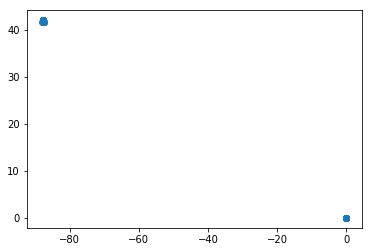

In [198]:
#Get coordinates of the nodes
loc = df_nodes['location']
coords = np.zeros([len(df_nodes['location']),2])
for i in range(len(df_nodes['location'])):
    loc_str = str(df_nodes['location'].iloc[i])
    lhs, rhs = loc_str.split("[",1)
    coordstr = loc_str[loc_str.find("[")+1:loc_str.find("]")].split(",")
    coords[i,:] = [float(s) for s in coordstr]
print(coords)

plt.scatter(coords[:,0], coords[:,1])
